<a href="https://colab.research.google.com/github/Ayush-Debnath/tinyLLM/blob/main/tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><i><h1>BUILDING A LLM</H1>from sctratch.....</i></b>

<i><H3>Data: The Verdict</h3></i> <br>
loctaion: /content/drive/MyDrive/LLMDATA/the-verdict.txt

<h3><i>Tokenizer</i></h3>

<i>Step 1:</i> Splitting the test in individual words and subword tokens.<br>
<i>Step 2:</i> Convert tokens into token IDs<br>
<i>Step 3:</i> Encode token IDs into vector representations

In [1]:
with open("/content/drive/MyDrive/LLMDATA/the-verdict.txt", "r",encoding="utf-8") as f:
  raw_text=f.read()
print("total number of characters:", len(raw_text))
print(raw_text[:99])


total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [2]:
import re

<h10>Preprocessing

In [3]:
preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',raw_text)
preprocessed=[item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:50])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself']


In [4]:
print(len(preprocessed))

4690


In [5]:
all_words=sorted(set(preprocessed))
print("vocab size: ",len(all_words))

vocab size:  1130


In [6]:
vocab={token: integer for integer,token in enumerate(all_words)}

In [7]:
for i,item in enumerate(vocab.items()):
  print(item)
  if i>=50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [8]:
class SimpleTokenizerV1:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self,text):
    # Reverted the incorrect ']' to ''' and removed the erroneous escape character
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)

    preprocessed=[
        item.strip() for item in preprocessed if item.strip()
    ]
    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    text=re.sub(r'\s+([,.?!"()\'])',r'\1',text)
    return text

In [9]:
tokenizer=SimpleTokenizerV1(vocab)
text=""""It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids=tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [10]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

Adding<br>
<|unk|> --> unknown token<br>
<|endoftext|> --> end of text token


In [11]:
all_tokens=sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])

In [12]:
vocab={token:integer for integer, token in enumerate(all_tokens)}

In [13]:
len(vocab.items())

1132

In [14]:
for i,item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [15]:
class SimpleTokenizerV2:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self,text):
    # Fix: Added missing closing parenthesis for the regex pattern
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed=[item.strip() for item in preprocessed if item.strip()]
    preprocessed=[
        item if item in self.str_to_int else "<|unk|>" for item in preprocessed
    ]

    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    text=re.sub(r'\s+([,.:;?!"()\'])',r'\1',text)
    return text


In [16]:
tokenizer=SimpleTokenizerV2(vocab)
text1="Hello, do you like some tea?"
text2="In the sunlit terraces of the palace."

text="<|endoftext|> ".join((text1,text2))

In [17]:
text

'Hello, do you like some tea?<|endoftext|> In the sunlit terraces of the palace.'

In [18]:
tokenizer.encode(text)

[1131,
 5,
 355,
 1126,
 628,
 910,
 975,
 10,
 1130,
 55,
 988,
 956,
 984,
 722,
 988,
 1131,
 7]

In [19]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like some tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


<h3><i>BYTE PAIR ENCODING(BPE)</i></h3><br>
It is a subword tokenization algorithm. Most common pair of consecutive bytes of data is replaced witha byte that does not occur in data.

In [20]:
!pip install tiktoken

In [21]:
import importlib
import tiktoken

print("tiktoken version: ",importlib.metadata.version("tiktoken") )

tiktoken version:  0.12.0


In [22]:
tokenizer=tiktoken.get_encoding("gpt2")

In [23]:
text=(
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace"
)

integers=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271]


<h3><i>CREATING INPUT-TARGETT PAIRS</i></h3><br>

we implement a dataloader that fetches the input-target pairs using a sliding window approach

In [24]:
with open ("/content/drive/MyDrive/LLMDATA/the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()
enc_text=tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [25]:
enc_sample=enc_text[50:]

In [26]:
context_size=4 #length of the input
"""The context_size of 4 means that the model is trained to look at a sequence of 4 words tp predict the next word
The input x is the first 4 tokens [1,2,3,4], and the target y is the next 4 tokens"""

x=enc_sample[:context_size]
y=enc_sample[1:context_size+1]

print(f"x:{x}")
print(f"y:     {y}")

x:[290, 4920, 2241, 287]
y:     [4920, 2241, 287, 257]


In [27]:
for i in range(1,context_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]
  print (context,"---->",desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [28]:
from IPython.core.inputtransformer2 import TokenTransformBase
for i in range(1,context_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]
  print(tokenizer.decode(context),"---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [29]:
import torch

In [30]:
from torch.utils.data import Dataset,DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self,txt,tokenizer,max_length,stride):
    self.input_ids=[]
    self.target_ids=[]

    token_ids=tokenizer.encode(txt,allowed_special={"<|endoftext|>"})

    for i in range(0,len(token_ids)-max_length,stride):
      input_chunk=token_ids[i:i+max_length]
      target_chunk=token_ids[i+1:i+max_length+1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self,idx):
    return self.input_ids[idx],self.target_ids[idx]




In [31]:
def create_dataloader_v1(txt,batch_size=4,max_length=256,
                         stride=128,shuffle=True,drop_last=True,
                         num_workers=0):
  tokenizer=tiktoken.get_encoding("gpt2")
  dataset=GPTDatasetV1(txt,tokenizer,max_length,stride)

  dataloader=DataLoader(
      dataset,
      batch_size=batch_size,
      shuffle=shuffle,
      drop_last=drop_last,
      num_workers=num_workers
  )

  return dataloader

In [32]:
with open ("/content/drive/MyDrive/LLMDATA/the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()

In [33]:
print("Pytorch version:",torch.__version__)
dataloader=create_dataloader_v1(
    raw_text,batch_size=1,max_length=4,stride=1,shuffle=False
)

data_iter=iter(dataloader)
first_batch=next(data_iter)
print(first_batch)

Pytorch version: 2.9.0+cpu
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [34]:
second_batch=next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [35]:
dataloader=create_dataloader_v1(raw_text,batch_size=8,max_length=4,stride=4,shuffle=False)

data_iter=iter(dataloader)
inputs,targets=next(data_iter)
print("Inputs:\n",inputs)
print("\nTargets:\n",targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [36]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 63.6 MB/s eta 0:00:00


<h3><i>Token Embeddings</i></h3>

In [37]:
from gensim.models import KeyedVectors

model = KeyedVectors.load(
    "/content/drive/MyDrive/LLMDATA/word2vec_google_news.model",
    mmap='r'
)


In [38]:
word_vectors=model
print(word_vectors['computer'])

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [39]:
print(word_vectors['cat'].shape)

(300,)


eg: King+Woman-Man=Queen

In [40]:
print(word_vectors.most_similar(positive=['king','woman'],negative=['man'],topn=10))

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]


In [41]:
#calculating similarity
print(word_vectors.similarity('woman','man'))
print(word_vectors.similarity('king','queen'))
print(word_vectors.similarity('boy','girl'))
print(word_vectors.similarity('nephew','niece'))
print(word_vectors.similarity('paper','water'))

0.76640123
0.6510957
0.8543272
0.7594367
0.11408084


Creating Token Embeddings

In [42]:
input_ids=torch.tensor([2,3,5,1])

In [43]:
vocab_size=6
output_dim=3
torch.manual_seed(123)
embedding_layer=torch.nn.Embedding(vocab_size,output_dim)

In [44]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [45]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


<h3><i>Positional Embeddings</i></h3>

In [46]:
vocab_size=50257
output_dim=246

token_embedding_layer=torch.nn.Embedding(vocab_size,output_dim)

In [47]:
max_length=4
dataloader=create_dataloader_v1(
    raw_text,batch_size=8,max_length=max_length,
    stride=max_length,shuffle=False
)

data_iter=iter(dataloader)
inputs,targets=next(data_iter)



In [48]:
print("Token IDs:\n",inputs)
print("\nInputs Shape:\n",inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs Shape:
 torch.Size([8, 4])


In [49]:
token_embeddings=token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 246])


In [50]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length,output_dim)

In [51]:
pos_embeddings=pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 246])


<h3><i>Implementing a Simplified Attention Mechanism</i></h3>

In [52]:
import torch

inputs=torch.tensor(
    [[0.43,0.15,0.89], #Your      (x^1)
     [0.55,0.87,0.66], #journey   (x^2)
     [0.57,0.85,0.64], #starts    (x^3)
     [0.22,0.58,0.33], #with      (x^4)
     [0.77,0.25,0.10], #one       (x^5)
     [0.05,0.80,0.55]] #step      (x^6)
)

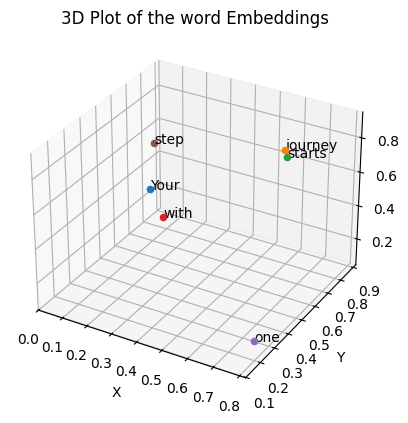

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words=['Your','journey','starts','with','one','step']

x_coords=inputs[:, 0].numpy()
y_coords=inputs[:, 1].numpy()
z_coords=inputs[:, 2].numpy()

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

for x,y,z, word in zip(x_coords,y_coords,z_coords,words):
  ax.scatter(x,y,z)
  ax.text(x,y,z,word,fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of the word Embeddings')
plt.show()



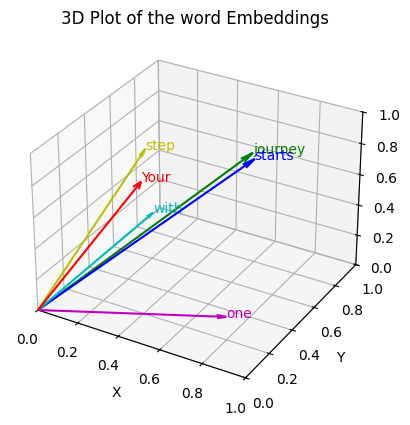

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

colors=['r','g','b','c','m','y']

for x,y,z,word,color in zip(x_coords,y_coords,z_coords,words,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.05)
  ax.text(x,y,z,word,fontsize=10,color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D Plot of the word Embeddings')
plt.show()

In [55]:
query=inputs[1]

attention_scores2=torch.empty(inputs.shape[0])

for i,x_i in enumerate(inputs):
  attention_scores2[i]=torch.dot(x_i,query)

print(attention_scores2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [56]:
attention_weights_2_tmp=attention_scores2/attention_scores2.sum()
print("Attention weights after normalisation:\n",attention_weights_2_tmp)
print("Sum: ", attention_weights_2_tmp.sum())

Attention weights after normalisation:
 tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum:  tensor(1.0000)


In [57]:
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum(dim=0)

  """
  e^x/sum of all e^x
  """

attention_weights_2_naive=softmax_naive(attention_scores2)

print("Attention weights after naive softmax:\n",attention_weights_2_naive)
print("Sum: ",attention_weights_2_naive.sum())

Attention weights after naive softmax:
 tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [58]:
attention_weights_2=torch.softmax(attention_scores2,dim=0)
"""
e^(x-max(x))/sum of all e^(x-max(x))
"""
print("Attention scores after pytorch softmax:\n",attention_weights_2)
print("Sum: ",attention_weights_2.sum())

Attention scores after pytorch softmax:
 tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [59]:
query=inputs[1]

context_vec_2=torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
  context_vec_2+=attention_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

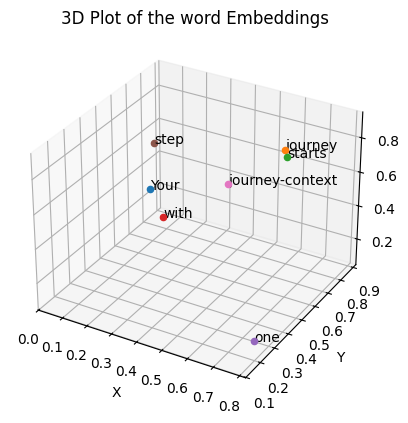

In [61]:
inputs=torch.tensor(
    [[0.43,0.15,0.89], #Your      (x^1)
     [0.55,0.87,0.66], #journey   (x^2)
     [0.57,0.85,0.64], #starts    (x^3)
     [0.22,0.58,0.33], #with      (x^4)
     [0.77,0.25,0.10], #one       (x^5)
     [0.05,0.80,0.55], #step      (x^6)
     [0.4419,0.6515,0.5683]]
)

words=['Your','journey','starts','with','one','step','journey-context']

x_coords=inputs[:, 0].numpy()
y_coords=inputs[:, 1].numpy()
z_coords=inputs[:, 2].numpy()

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

for x,y,z, word in zip(x_coords,y_coords,z_coords,words):
  ax.scatter(x,y,z)
  ax.text(x,y,z,word,fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of the word Embeddings')
plt.show()


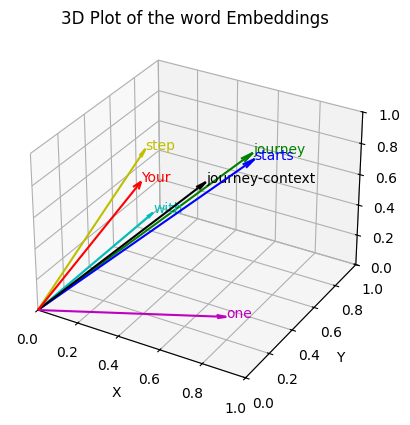

In [62]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
colors=['r','g','b','c','m','y','k']

for x,y,z,word,color in zip(x_coords,y_coords,z_coords,words,colors):
  ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.05)
  ax.text(x,y,z,word,fontsize=10,color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.title('3D Plot of the word Embeddings')
plt.show()

In [63]:
inputs=torch.tensor(
    [[0.43,0.15,0.89], #Your      (x^1)
     [0.55,0.87,0.66], #journey   (x^2)
     [0.57,0.85,0.64], #starts    (x^3)
     [0.22,0.58,0.33], #with      (x^4)
     [0.77,0.25,0.10], #one       (x^5)
     [0.05,0.80,0.55]] #step      (x^6)
)

In [64]:
attention_scores=torch.empty(inputs.shape[0],inputs.shape[0])

for i,x_i in enumerate(inputs):
  for j,x_j in enumerate(inputs):
    attention_scores[i,j]=torch.dot(x_i,x_j)

print(attention_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [65]:
attention_scores=inputs@inputs.T
print(attention_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [66]:
attention_weights=torch.softmax(attention_scores,dim=-1)
print(attention_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [67]:
row2sum=sum(attention_weights[1])
print(row2sum)
print("all row sum: ",attention_weights.sum(dim=-1))

tensor(1.)
all row sum:  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [68]:
all_context_vecs=attention_weights@inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


<h3><i>Implementing self attention with trainable weights</i></h3>

In [69]:
import torch

inputs=torch.tensor(
    [[0.43,0.15,0.89], #Your      (x^1)
     [0.55,0.87,0.66], #journey   (x^2)
     [0.57,0.85,0.64], #starts    (x^3)
     [0.22,0.58,0.33], #with      (x^4)
     [0.77,0.25,0.10], #one       (x^5)
     [0.05,0.80,0.55]] #step      (x^6)
)

In [70]:
x_2=inputs[1] #A
d_in=inputs.shape[1] #B
d_out=2 #C

In [71]:
torch.manual_seed(123)
W_query=torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
W_key=torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
W_value=torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)

In [75]:
print(W_query,"\n", W_key,"\n", W_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]]) 
 Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]]) 
 Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [76]:
query_2=x_2@W_query
key_2=x_2@W_key
value_2=x_2@W_value

In [77]:
print("query_2:\n",query_2)
print("key_2:\n",key_2)
print("value_2:\n",value_2)

query_2:
 tensor([0.4306, 1.4551])
key_2:
 tensor([0.4433, 1.1419])
value_2:
 tensor([0.3951, 1.0037])


In [78]:
keys=inputs@W_key
queries=inputs@W_query
values=inputs@W_value

In [79]:
print("keys.shape: ",keys.shape)
print("queries.shape: ",queries.shape)
print("values.shape: ",values.shape)

keys.shape:  torch.Size([6, 2])
queries.shape:  torch.Size([6, 2])
values.shape:  torch.Size([6, 2])


In [81]:
keys_2=keys[1]
attn_score_22=query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [82]:
attn_scores_2=query_2@keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [83]:
attn_scores=queries@keys.T
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [85]:
d_k=keys.shape[-1]
attn_weights_2=torch.softmax(attn_scores_2/d_k**0.5,dim=-1)
print(attn_weights_2)
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


In [86]:
import torch

tensor=torch.tensor([0.1,-0.2,0.3,-0.2,0.5])

softmax_result=torch.softmax(tensor,dim=-1)
print("without scaling: ",softmax_result)

scaled_tensor=tensor*8
softmax_scaled_result=torch.softmax(scaled_tensor,dim=-1)
print("with scaling: ",softmax_scaled_result)

without scaling:  tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
with scaling:  tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


In [88]:
import numpy as np

def compute_variance(dim,num_trails=1000):
  dot_products=[]
  scaled_dot_products=[]

  for _ in range(num_trails):
    q=np.random.randn(dim)
    k=np.random.randn(dim)

    dot_product=np.dot(q,k)
    dot_products.append(dot_product)

    scaled_dot_product=dot_product/np.sqrt(dim)
    scaled_dot_products.append(scaled_dot_product)

  variance_before_scaling=np.var(dot_products)
  variance_after_scaling=np.var(scaled_dot_products)

  return variance_before_scaling,variance_after_scaling


variance_before_5, variance_after_5=compute_variance(5)
print(f"variance before scaling (dim=5): {variance_before_5}")
print(f"variance after scaling (dim=5): {variance_after_5}")

variance_before_20, variance_after_20=compute_variance(20)
print(f"variance before scaling (dim=20): {variance_before_20}")
print(f"variance after scaling (dim=20): {variance_after_20}")

variance before scaling (dim=5): 4.84909055610017
variance after scaling (dim=5): 0.969818111220034
variance before scaling (dim=20): 19.739780445775846
variance after scaling (dim=20): 0.9869890222887923


In [89]:
context_vec_2=attn_weights_2@values
print(context_vec_2)

tensor([0.3061, 0.8210])


<h3><i>Implementing a compact self attention python class</i></h3>

In [92]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

  def __init__(self,d_in,d_out):
    super().__init__()
    self.W_query=nn.Parameter(torch.rand(d_in,d_out))
    self.W_key=nn.Parameter(torch.rand(d_in,d_out))
    self.W_value=nn.Parameter(torch.rand(d_in,d_out))

  def forward(self,x):
    """returns context vectors"""
    keys=x@self.W_key
    queries=x@self.W_query
    values=x@self.W_value

    attn_scores=queries@keys.T
    attn_weights=torch.softmax(
        attn_scores/keys.shape[-1]**0.5,dim=-1
    )

    context_vec=attn_weights@values
    return context_vec

In [93]:
torch.manual_seed(123)
sa_v1=SelfAttention_v1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [97]:
class SelfAttention_v2(nn.Module):

  def __init__(self,d_in,d_out,qkv_bias=False):
    super().__init__()
    self.W_query=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_key=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_value=nn.Linear(d_in,d_out,bias=qkv_bias)

  def forward(self,x):
    keys=self.W_key(x)
    queries=self.W_query(x)
    values=self.W_value(x)

    attn_scores=queries@keys.T
    attn_weights=torch.softmax(
          attn_scores/keys.shape[-1]**0.5,dim=-1
      )

    context_vec=attn_weights@values
    return context_vec

In [99]:
torch.manual_seed(789)
sa_v2=SelfAttention_v2(d_in,d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
